In [1]:
import socket
import time
import json
import matplotlib.pyplot as plt
import numpy as np
from threading import Thread
import traceback

In [2]:
UDP_IP_ADDRESS = "127.0.0.1"
UDP_PORT_NO = 1234

In [3]:
serverSock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
#serverSock.setblocking(0)
serverSock.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)
serverSock.bind((UDP_IP_ADDRESS, UDP_PORT_NO))
serverSock.listen(5)

Connection accepted from:  ('127.0.0.1', 50046)
Msg:  {"lat":-6,"lon":-2.02}
x: [-2.02]
y: [-6]


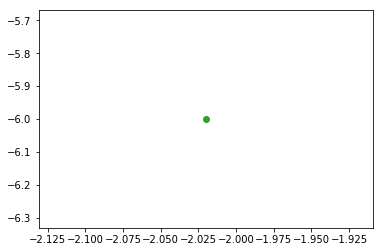

Msg:  {"lat":5,"lon":2}
x: [-2.02, 2]
y: [-6, 5]


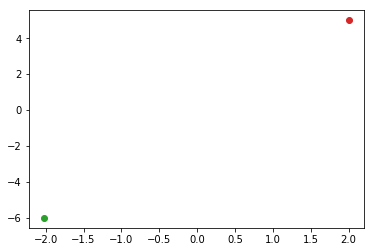

Msg:  {"lat":1,"lon":2}
x: [-2.02, 2, 2]
y: [-6, 5, 1]


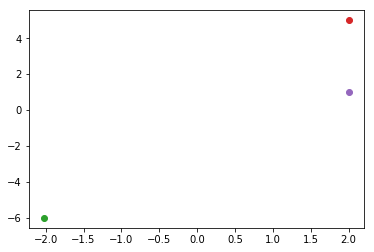

Msg:  {"lat":1,"lon":2}
x: [-2.02, 2, 2, 2]
y: [-6, 5, 1, 1]


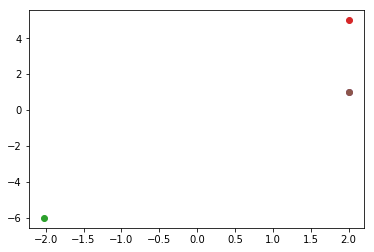

Msg:  {"lat":1,"lon":0}
x: [-2.02, 2, 2, 2, 0]
y: [-6, 5, 1, 1, 1]


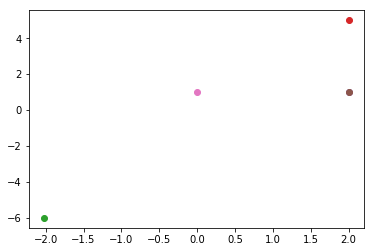

Msg:  {"lat":0,"lon":0}
x: [-2.02, 2, 2, 2, 0, 0]
y: [-6, 5, 1, 1, 1, 0]


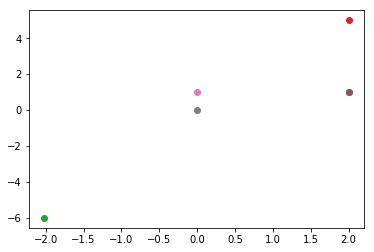

In [ ]:
x = []
y = []
fig,ax=plt.subplots()

tmp=0
connected = False
timeout = time.time() + 60*45
while time.time() < timeout:
    # Wait for connection
    while not connected and time.time() < timeout:
        try:
            conn,addr = serverSock.accept()
            connected = True
            print("Connection accepted from: ", addr)
            break;
        except socket.error:
            ''''''
    
    # Accept messages
    if connected:
        try:
            # Receive message
            data = conn.recv(1024)
            msg = data.decode()
            print("Msg: ", msg)
            
            # Graceful exit condition
            if msg == "":
                break;
                
            # Extract data
            obj = json.loads(msg)
            x.append(obj['lon'])
            y.append(obj['lat'])
            print("x:",x)
            print("y:",y)

            # Plot
            while tmp < len(x):
                tmp+=1
                plt.plot(x[0],y[0])
                plt.plot([],[])
                for i in range(0,tmp):
                    plt.plot(x[i],y[i],'o')
                time.sleep(.5)
                if tmp==1:
                    plt.show()
                else:
                    plt.savefig('FOBStream/plot.jpg')
                    plt.show()#draw()
        except socket.error:
            # Will throw error every time no message is received...
            # This is fine, just continue looping
            '''traceback.print_exc()
            conn.close()
            break'''
    else:
        print("Timeout reached before connection established")

conn.close()
print("Done.")